In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

2022-11-06 10:30:58.035139: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
data = pd.read_csv('datasets/INFY.csv')

In [4]:
data.info(), data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1695 non-null   object 
 1   Open       1695 non-null   float64
 2   High       1695 non-null   float64
 3   Low        1695 non-null   float64
 4   Close      1695 non-null   float64
 5   Adj Close  1695 non-null   float64
 6   Volume     1695 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 92.8+ KB


(None, (1695, 7))

In [5]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-31,8.470,8.47,8.360,8.375,7.060092,2945400
1,2016-01-04,8.230,8.23,8.115,8.120,6.845129,8218400
2,2016-01-05,8.150,8.20,8.070,8.100,6.828269,7265800
3,2016-01-06,8.045,8.15,8.000,8.035,6.773474,7042000
4,2016-01-07,7.905,8.14,7.880,8.030,6.769259,7850400


In [6]:
data['Close'] = pd.to_numeric(data.Close, errors='coerce')
data = data.dropna()
trainData = data.iloc[:, 4:5].values

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1695 non-null   object 
 1   Open       1695 non-null   float64
 2   High       1695 non-null   float64
 3   Low        1695 non-null   float64
 4   Close      1695 non-null   float64
 5   Adj Close  1695 non-null   float64
 6   Volume     1695 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 92.8+ KB


In [8]:
sc = MinMaxScaler(feature_range=(0, 1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1695, 1)

In [15]:
x_train = []
y_train = []

for i in range(60, 1695):
    x_train.append(trainData[i-60:i, 0])
    y_train.append(trainData[i, 0])
    
x_train,x_test,y_train,y_test = train_test_split(x_train, y_train,test_size=0.2,random_state=123)

# x_train, y_train = np.array(x_train), np.array(y_train)
# x_train.shape, y_train.shape

x_train, y_train, x_test, y_test = np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1308, 60), (1308,), (327, 60), (327,))

In [24]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape, x_test.shape

((1308, 60, 1), (327, 60))

In [17]:
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [18]:
hist = model.fit(x_train, y_train, epochs=20, batch_size=32, verbose=2)

Epoch 1/20
41/41 - 10s - loss: 0.0920 - 10s/epoch - 237ms/step
Epoch 2/20
41/41 - 5s - loss: 0.0808 - 5s/epoch - 125ms/step
Epoch 3/20
41/41 - 5s - loss: 0.0802 - 5s/epoch - 121ms/step
Epoch 4/20
41/41 - 5s - loss: 0.0807 - 5s/epoch - 121ms/step
Epoch 5/20
41/41 - 5s - loss: 0.0796 - 5s/epoch - 121ms/step
Epoch 6/20
41/41 - 5s - loss: 0.0796 - 5s/epoch - 119ms/step
Epoch 7/20
41/41 - 5s - loss: 0.0794 - 5s/epoch - 119ms/step
Epoch 8/20
41/41 - 5s - loss: 0.0793 - 5s/epoch - 121ms/step
Epoch 9/20
41/41 - 5s - loss: 0.0789 - 5s/epoch - 120ms/step
Epoch 10/20
41/41 - 5s - loss: 0.0789 - 5s/epoch - 121ms/step
Epoch 11/20
41/41 - 5s - loss: 0.0789 - 5s/epoch - 120ms/step
Epoch 12/20
41/41 - 5s - loss: 0.0789 - 5s/epoch - 121ms/step
Epoch 13/20
41/41 - 5s - loss: 0.0786 - 5s/epoch - 123ms/step
Epoch 14/20
41/41 - 5s - loss: 0.0787 - 5s/epoch - 122ms/step
Epoch 15/20
41/41 - 5s - loss: 0.0790 - 5s/epoch - 122ms/step
Epoch 16/20
41/41 - 5s - loss: 0.0792 - 5s/epoch - 126ms/step
Epoch 17/20
41/

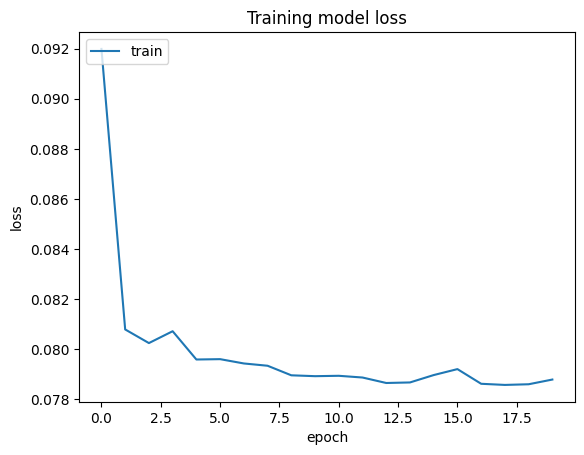

In [19]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [39]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(327, 60, 1)

In [40]:
y_pred = model.predict(x_test)

11/11 [==============================] - 1s 34ms/step


In [45]:
nsamples, nx, ny = y_pred.shape
y_pred = np.reshape(y_pred, (nsamples, nx*ny))

ValueError: not enough values to unpack (expected 3, got 2)

In [46]:
y_pred.shape

(327, 60)

In [47]:
predicted_price = sc.inverse_transform(y_pred)

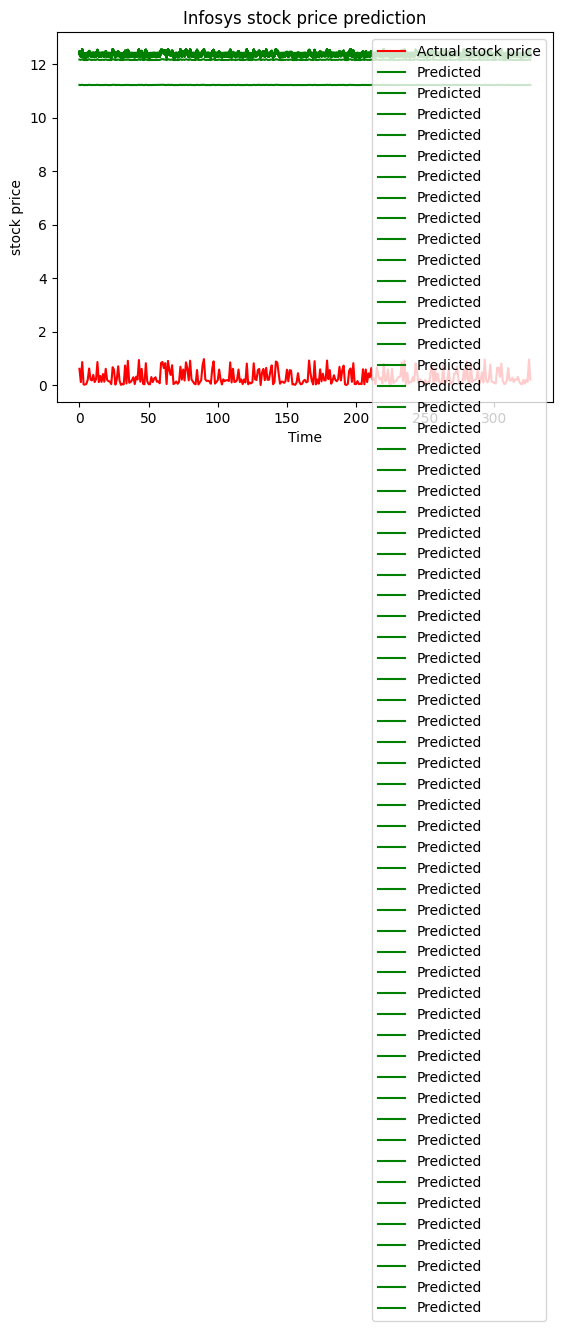

In [49]:
plt.plot(y_test, color='red', label='Actual stock price')
plt.plot(predicted_price, color='green', label='Predicted')
plt.title('Infosys stock price prediction')
plt.xlabel('Time')
plt.ylabel('stock price')
plt.legend()
plt.show()